Nama     : **Muhamad Ilyas**               
Email    : **181240000831@unisnu.ac.id**   
Domisili : **Kabupaten Jepara, Jawa Tengah**

In [1]:
#menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import missingno
sns.set_style('whitegrid')
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as ex
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [3]:
#membaca file
df = pd.read_csv('/content/drive/MyDrive/Dataset/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
#mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
#mengecek deskripsi statistik data
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
#menghapus kolom yang tidak diperlukan
df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [7]:
# Memeriksa jumlah nilai nol

round((df.isnull().sum() * 100)/(df.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

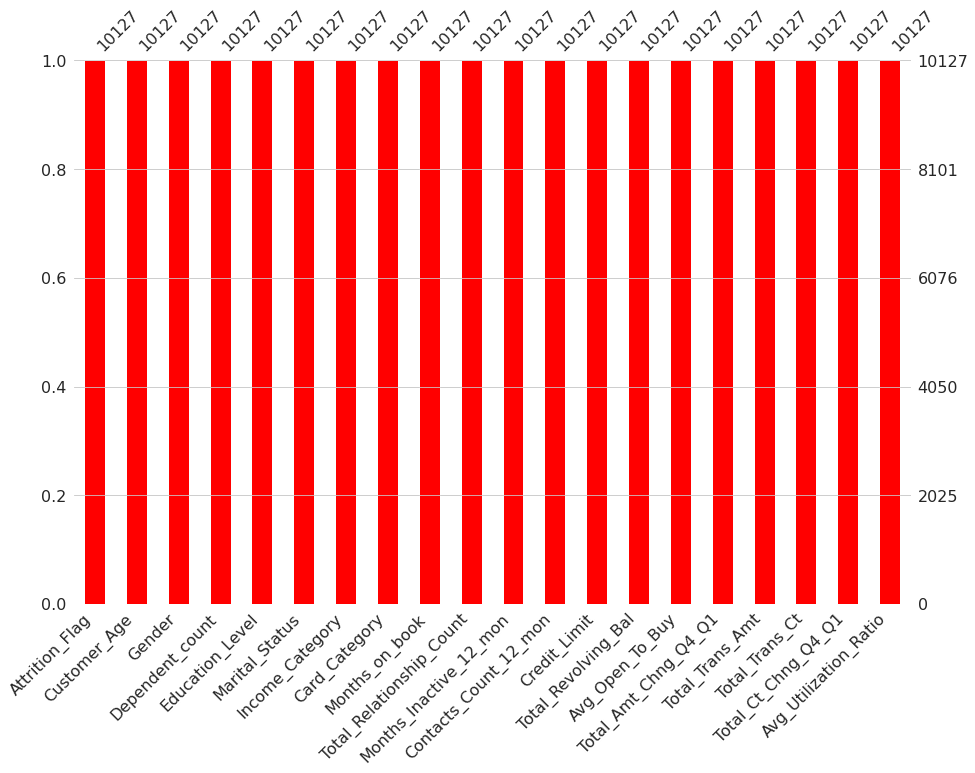

In [8]:
#Mengecek misingvalue dengan menggunakan missingno
missingno.bar(df, color = 'red', figsize = (15,10))
plt.show()

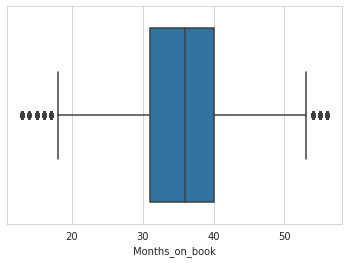

In [9]:
#boxplot untuk mendeteksi outliers untuk periode hubungan dengan bank
sns.boxplot(x=df['Months_on_book'])

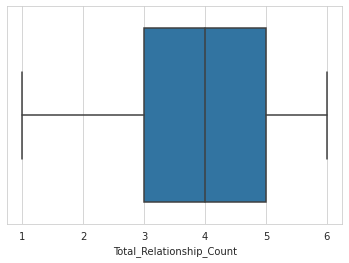

In [10]:
#boxplot untuk mendeteksi outliers untuk Jumlah kepemilikan kartu
sns.boxplot(x=df['Total_Relationship_Count'])

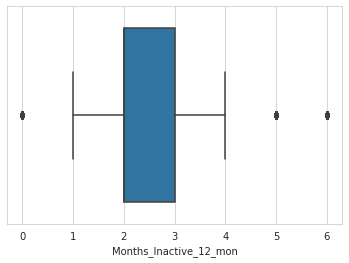

In [11]:
#boxplot untuk mendeteksi outliers untuk Jumlah ketidakaktifan kartu
sns.boxplot(x=df['Months_Inactive_12_mon'])

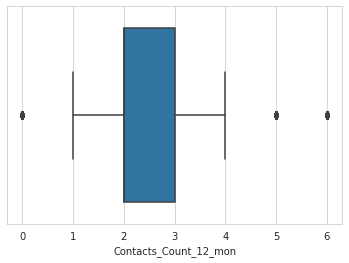

In [12]:
#boxplot untuk mendeteksi outliers untuk Jumlah penggunaan kartu
sns.boxplot(x=df['Contacts_Count_12_mon'])

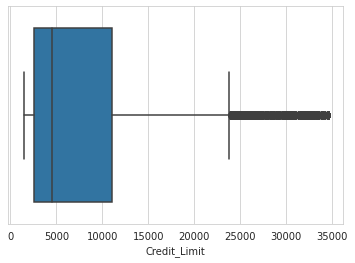

In [13]:
#boxplot untuk mendeteksi outliers untuk limit kredit
sns.boxplot(x=df['Credit_Limit'])

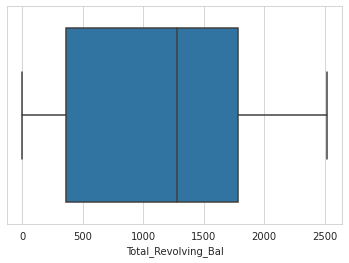

In [14]:
#boxplot untuk mendeteksi outliers untuk pembayaran tagihan kredit
sns.boxplot(x=df['Total_Revolving_Bal'])

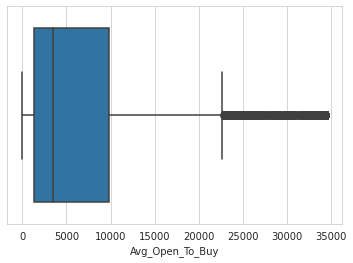

In [15]:
#boxplot untuk mendeteksi outliers untuk Beli Jalur Kredit (Rata-rata 12 bulan terakhir)
sns.boxplot(x=df['Avg_Open_To_Buy'])

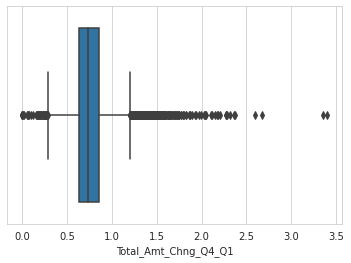

In [16]:
#boxplot untuk mendeteksi outliers untuk Perubahan Jumlah Transaksi (Q4 ke Q1)
sns.boxplot(x=df['Total_Amt_Chng_Q4_Q1'])

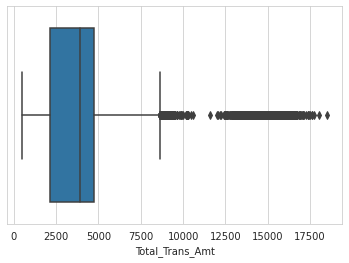

In [17]:
#boxplot untuk mendeteksi outliers untuk Total Jumlah Transaksi (12 bulan terakhir)
sns.boxplot(x=df['Total_Trans_Amt'])

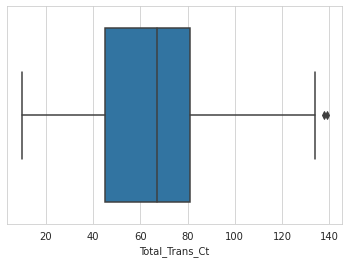

In [18]:
#boxplot untuk mendeteksi outliers untuk Jumlah Transaksi Total (12 bulan terakhir)
sns.boxplot(x=df['Total_Trans_Ct'])

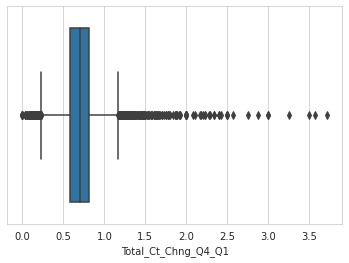

In [19]:
#boxplot untuk mendeteksi outliers untuk Perubahan Jumlah Transaksi (Q4 over Q1)
sns.boxplot(x=df['Total_Ct_Chng_Q4_Q1'])

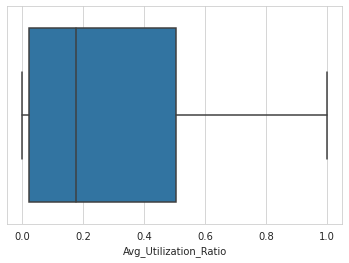

In [20]:
#boxplot untuk mendeteksi outliers untuk Rasio Penggunaan Kartu Rata-rata
sns.boxplot(x=df['Avg_Utilization_Ratio'])

In [21]:
#mengatasi outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset
df.shape

(6802, 20)

In [22]:
#membagi dataset menjadi numerical features dan categorical features.
numerical_features = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
categorical_features = ['Gender','Attrition_Flag','Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [23]:
#EDA pada Usia Pelanggan
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Attrition_Flag'],name='Box Plot Aktivitas Pelanggan',boxmean=True)
tr2=go.Histogram(x=df['Attrition_Flag'],name='Histogram Aktivitas Pelanggan')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Aktivitas Pelanggan")
fig.show()
ex.pie(df,names='Attrition_Flag',title='Pembagian Aktivitas Pelanggan',hole=0.33)

In [26]:
# EDA pada Gender
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Gender'],name='Box Plot Jenis Kelamin',boxmean=True)
tr2=go.Histogram(x=df['Gender'],name='Histogram Jenis Kelamin')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Jenis Kelamin Pelanggan")
fig.show()
ex.pie(df,names='Gender',title='Pembagian Jenis Kelamin Pelanggan',hole=0.33)

In [27]:
#EDA pada Usia Pelanggan
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Customer_Age'],name='Box Plot Usia Pelanggan',boxmean=True)
tr2=go.Histogram(x=df['Customer_Age'],name='Histogram Usia Pelanggan')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Usia Pelanggan")
fig.show()
ex.pie(df,names='Customer_Age',title='Pembagian Usia Pelanggan',hole=0.33)

In [28]:
#EDA untuk Dependent_count
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Dependent_count'],name='Box Plot Jumlah tanggungan',boxmean=True)
tr2=go.Histogram(x=df['Dependent_count'],name='Histogram Jumlah tanggungan')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Jumlah tanggungan")
fig.show()
ex.pie(df,names='Dependent_count',title='Pembagian Jumlah tanggungan',hole=0.33)

In [29]:
#EDA untuk Kualifikasi Pendidikan
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Education_Level'],name='Box Plot Kualifikasi Pendidikan',boxmean=True)
tr2=go.Histogram(x=df['Education_Level'],name='Histogram Kualifikasi Pendidikan')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Kualifikasi Pendidikan")
fig.show()
ex.pie(df,names='Education_Level',title='Pembagian Kualifikasi Pendidikan',hole=0.33)

In [30]:
#EDA untuk Kualifikasi Status pernikahan
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Marital_Status'],name='Box Plot Status pernikahan',boxmean=True)
tr2=go.Histogram(x=df['Marital_Status'],name='Histogram Status pernikahan')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Status pernikahan")
fig.show()
ex.pie(df,names='Marital_Status',title='Pembagian Status pernikahan',hole=0.33)

In [31]:
#EDA untuk Kategori Pendapatan Tahunan dari pemegang akun
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Income_Category'],name='Box Plot Pendapatan Tahunan',boxmean=True)
tr2=go.Histogram(x=df['Income_Category'],name='Histogram Pendapatan Tahunan')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Kategori Pendapatan Tahunan dari pemegang akun")
fig.show()
ex.pie(df,names='Income_Category',title='Pembagian Kategori Pendapatan Tahunan dari pemegang akun',hole=0.33)

In [32]:
#EDA untuk Jenis Kartu
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Card_Category'],name='Box Plot Jenis Kartu',boxmean=True)
tr2=go.Histogram(x=df['Card_Category'],name='Histogram Jenis Kartu')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Jenis Kartu")
fig.show()
ex.pie(df,names='Card_Category',title='Pembagian Jenis Kartu',hole=0.33)

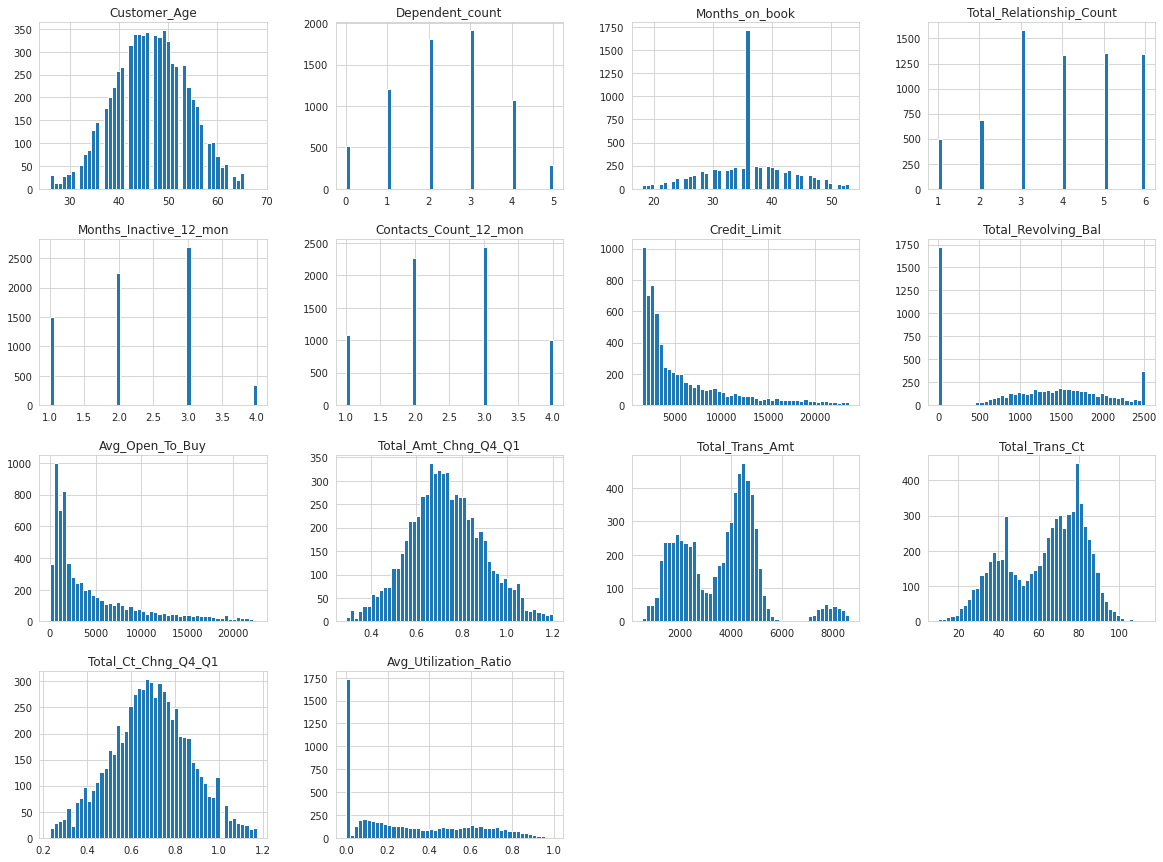

In [33]:
#numeric features
df.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Korelasi Matrix untuk Fitur Numerik ')

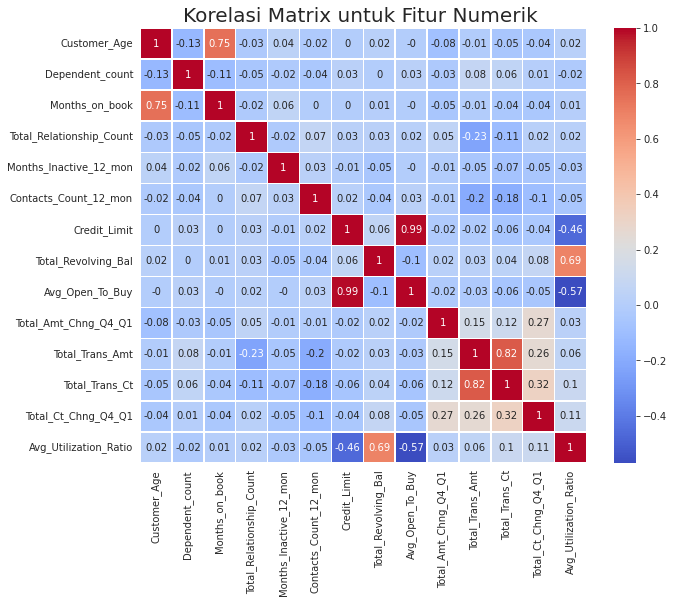

In [35]:
#Untuk mengevaluasi skor korelasinya, gunakan fungsi corr()
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Korelasi Matrix untuk Fitur Numerik ", size=20)

In [36]:
#data preparation penerapan teknik one-hot-encoding
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Attrition_Flag'], prefix='Attrition_Flag', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['Dependent_count'], prefix='Dependent_count', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['Education_Level'], prefix='Education_Level', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['Marital_Status'], prefix='Marital_Status', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['Income_Category'], prefix='Income_Category', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['Card_Category'], prefix='Card_Category', drop_first=True)],axis=1)
df.drop(['Attrition_Flag','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category'], axis=1, inplace=True)
df.head()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
10,42,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
14,57,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
19,45,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
21,62,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
23,47,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [38]:
#penerapan Reduksi Dimensi dengan PCA
sns.pairplot(df[['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']], plot_kws={"s": 3});

Output hidden; open in https://colab.research.google.com to view.

In [39]:
#aplikasikan class PCA dari library scikit learn
pca = PCA(n_components=3, random_state=123)
pca.fit(df[['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])
princ_comp = pca.transform(df[['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])

In [40]:
#mengetahui proporsi informasi dari ketiga komponen
pca.explained_variance_ratio_.round(3)

array([0.935, 0.047, 0.018])

In [41]:
#pengaplikasian fungsi train_test_split dari sklearn
X = df.drop(["Attrition_Flag"],axis =1,errors='ignore')
y = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [42]:
# Menormalisasi Data
req_cols = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [43]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['RandomForest','AdaBoost'])

In [44]:
#penerapan algoritma random forest

RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)     

In [45]:
#Penerapan metode adaptive boosting.
 
boosting = AdaBoostClassifier(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [47]:
#proses scaling antara data latih dan data uji (Evaluasi Model)
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



IndexError: ignored

In [46]:
#evaluasi kedua model dengan metrik MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['RandomForest','AdaBoost'])
model_dict = {'RandomForest': RF, 'AdaBoost': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
RandomForest,0,0.000550661
AdaBoost,0.0281926,0.0303539


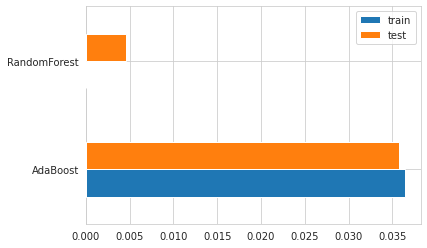

In [ ]:
#Untuk memudahkan, plot metrik tersebut dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
#Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

ValueError: ignored

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>F1 Score On Test Data<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>AdaBoost<b>'], [np.round(f1(rf_prediction,test_y),2), 
                                                                          np.round(f1(ada_prediction,test_y),2)])

fig.update_layout(title='Model Results On Test Data')
fig.show()

NameError: ignored